### Some useful routines to understand programming assignment one

In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### The data is provided as a MATLAB binary which can be loaded into Python using the following command

In [3]:
mat = loadmat('./mnist_all.mat') 

In [5]:
tr0 = mat['train0']

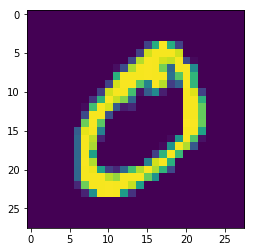

In [7]:
plt.imshow(np.reshape(tr0[0,:],((28,28))))

#### The data is essentially a dictionary containing several matrices (train0-train9 are training data matrices and test0-test9 are the test data matrices)

#### Each matrix in the dictionary corresponds to a digit. Each row is one image (28 x 28 matrix flattened into a 784 length vector)

In [6]:
# For example train9 is all training images corresponding to the digit 9
train9 = mat.get('train9')
print(train9.shape)

(5949, 784)


#### To view any one digit you need to take a row and reshape it back as a matrix

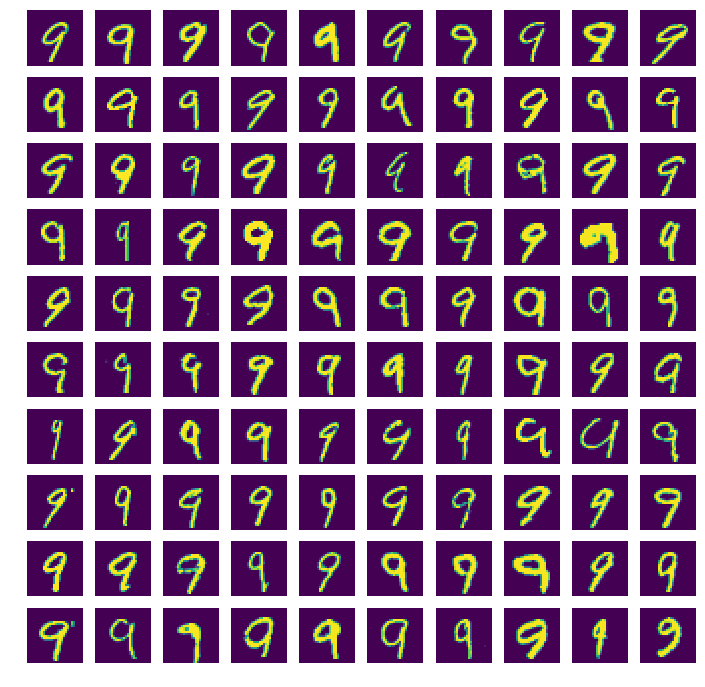

In [8]:
#plot 100 random images from the digit '9' data set
s = random.sample(range(train9.shape[0]),100)
fig = plt.figure(figsize=(12,12))
for i in range(100):
    plt.subplot(10,10,i+1)
    row = train9[s[i],:]
    # note that each row is a flattened image
    # we first reshape it to a 28x28 matrix
    plt.imshow(np.reshape(row,((28,28))))
    plt.axis('off')


#### Here are random 10 images for each digit

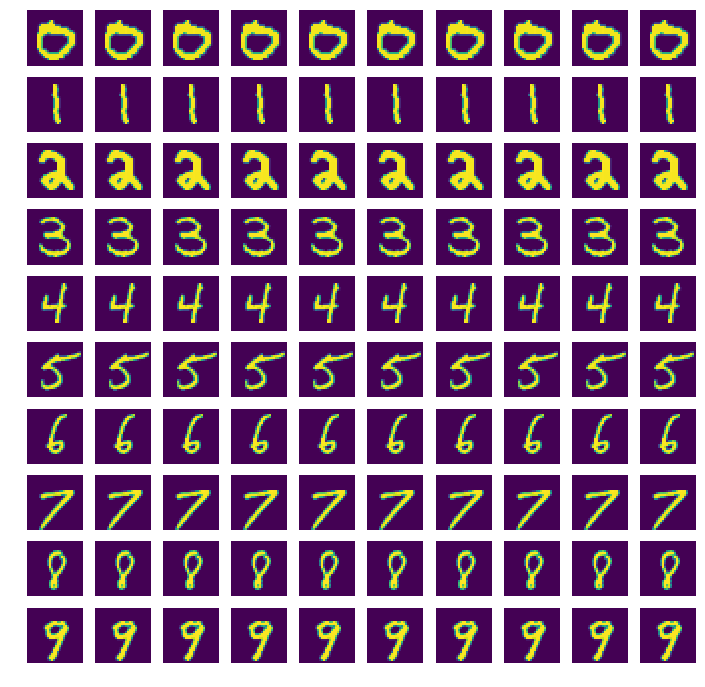

In [9]:
fig = plt.figure(figsize=(12,12))
for i in range(10):
    trainx = mat.get('train'+str(i))
    # note the use of function random.sample to extract 10 rows randomly
    s = random.sample(range(trainx.shape[0]),10)
    for j in range(10):
        plt.subplot(10,10,10*i+j+1)
        row = trainx[s[i],:]
        # note that each row is a flattened image
        # we first reshape it to a 28x28 matrix
        plt.imshow(np.reshape(row,((28,28))))
        plt.axis('off')


#### To check the total number of training examples you need to iterate over all trainx matrices

In [11]:
trainsize = 0
for i in range(10):
    m = mat.get('train'+str(i))
    trainsize = trainsize + m.shape[0]
print(trainsize)

60000


### Pointers about splitting a matrix into two random parts

In [12]:
# Assume we have a matrix (I will repurpose one of the trainx matrices from above)
A = mat.get('train0')
print(A.shape)

(5923, 784)


In [16]:
# I want to break it into two random parts, one matrix with 1000 rows and second with the rest
a = range(A.shape[0])
aperm = np.random.permutation(a)
A1 = A[aperm[0:1000],:]
A2 = A[aperm[1000:],:]
print A1.shape
print A2.shape

(1000, 784)
(4923, 784)


<i>Hint</i>: Using the same permuted (shuffled) vector aperm, you can pick out the corresponding rows from another matrix (or column vector).

## Playing with AI QuickDraw Dataset
<img width=500px src="https://quickdraw.withgoogle.com/static/shareimg.png"/>

Go here for more information - <a href="https://quickdraw.withgoogle.com/data">https://quickdraw.withgoogle.com/data</a>

In [6]:
import pickle

In [39]:
with open('./AI_quick_draw.pickle','rb') as f:
    data_train = pickle.load(f)
    label_train = pickle.load(f)
    data_test = pickle.load(f)
    label_test = pickle.load(f)

In [52]:
names = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [46]:
r = np.random.permutation(len(label_train))

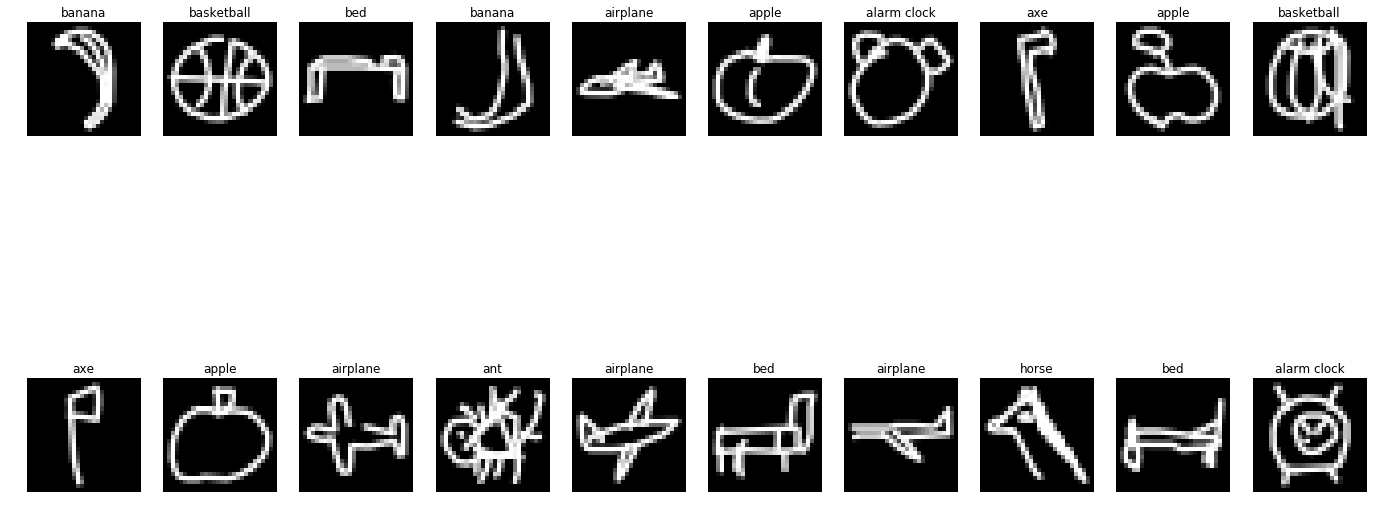

In [56]:
fig = plt.figure(figsize=(24,12))
for i in range(20):
    plt.subplot(2,10,i+1)
    row = data_train[r[i],:]
    plt.imshow(np.reshape(row,((28,28))),cmap='gray')
    l = np.where(label_train[r[i],:] == 1)[0][0]
    plt.title(names[l])
    plt.axis('off')
